In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [146]:
# Let's load the data
df = pd.read_csv('data/USvideos.csv')
# df = df[['video_id','category_id','publish_time','views', 'likes', 'dislikes', 'comment_count']]

# drop the 'video_id' since unique
df.drop(columns=['video_id'],inplace=True)
print("Data Frame shape: ", df.shape)
print(df.nunique())

Data Frame shape:  (40949, 16)
video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [147]:
# change catagory_id to catagory name
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

df.drop(columns=['category_id'],inplace=True)

In [148]:
print(df.isnull().sum(axis=0)/df.shape[0])
print(sum(df.isnull().sum(axis=1)!=0)/df.shape[0])

video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               0.013920
category_name             0.001392
dtype: float64
0.015311729224156878


In [114]:
df['category_name'].unique()

array(['People and Blogs', 'Entertainment', 'Comedy',
       'Science and Technology', 'Film and Animation', 'News & Politics',
       'Sport', 'Music', 'Pets and Animals', 'Education',
       'How to and Style', 'Cars and Vehicles', 'Travel and Events',
       'Gaming', 'Non Profits and Activism', nan], dtype=object)

In [142]:
df[df['views']==df['views'].max()]

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate
38547,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.230544,0.152541


In [145]:
top10 = df.sort_values('views',ascending=False,inplace=False)
top10.head(10)

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate
38547,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.230544,0.152541
38345,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.250619,0.153342
38146,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.265987,0.154058
37935,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.299360,0.155417
37730,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.322802,0.156335
37531,18.28.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",200820941,4714942,316129,491005,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.347834,0.157418
37333,18.27.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",196222618,4656929,311042,485797,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.373289,0.158515
37123,18.26.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",190950401,4594931,305435,479917,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.406348,0.159955
36913,18.25.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",184446490,4512326,298157,473039,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.446415,0.161650
36710,18.24.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",179045286,4437175,291098,466470,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music,2.478242,0.162583


In [55]:
# collect the various features
# ['trending_date', 'title', 'channel_title', 'category_id',
#        'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
#        'thumbnail_link', 'comments_disabled', 'ratings_disabled',
#        'video_error_or_removed', 'description', 'category_name']
num_ftrs = ['likes', 'dislikes', 'comment_count']
cat_ftrs = ['category_name', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
y = df['views']
print(y.describe())

count    4.094900e+04
mean     2.360785e+06
std      7.394114e+06
min      5.490000e+02
25%      2.423290e+05
50%      6.818610e+05
75%      1.823157e+06
max      2.252119e+08
Name: views, dtype: float64


In [121]:
# preprocess feature types one by one

# one-hot encoder
ohe = OneHotEncoder(sparse=False)
si = SimpleImputer(strategy='constant',fill_value='missing')
cat_values = ohe.fit_transform(si.fit_transform(df[cat_ftrs]))
cat_ftr_names = ohe.get_feature_names()
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)
# print(df_cat)

# standard scaler
ss = StandardScaler()
num_values = ss.fit_transform(df[num_ftrs])
df_num = pd.DataFrame(data=num_values,columns = num_ftrs)

# MinMax scalar
mms = MinMaxScaler()
num_values = mms.fit_transform(df[num_ftrs])
df_num = pd.DataFrame(data=num_values,columns = num_ftrs)

df_preprocessed = pd.concat([df_cat,df_num],axis=1)
df_preprocessed['views'] = y
# print(df_preprocessed.shape)
# df_preprocessed.head()

Entertainment               0.243327
Music                       0.158050
How to and Style            0.101248
Comedy                      0.084422
People and Blogs            0.078390
News & Politics             0.060734
Science and Technology      0.058634
Film and Animation          0.057266
Sport                       0.053090
Education                   0.040441
Pets and Animals            0.022467
Gaming                      0.019952
Travel and Events           0.009817
Cars and Vehicles           0.009378
Non Profits and Activism    0.001392
Name: category_name, dtype: float64


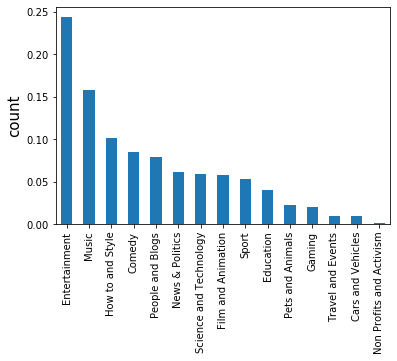

In [128]:
# which categories are easier to be trending videos
# print(df['category_name'].value_counts())
print(df['category_name'].value_counts()/df['category_name'].shape)
# plt.figure(figsize=(6.4,4.8))
pd.value_counts(df['category_name'], normalize=True).plot.bar()
plt.ylabel('count', fontsize=15)
plt.show()

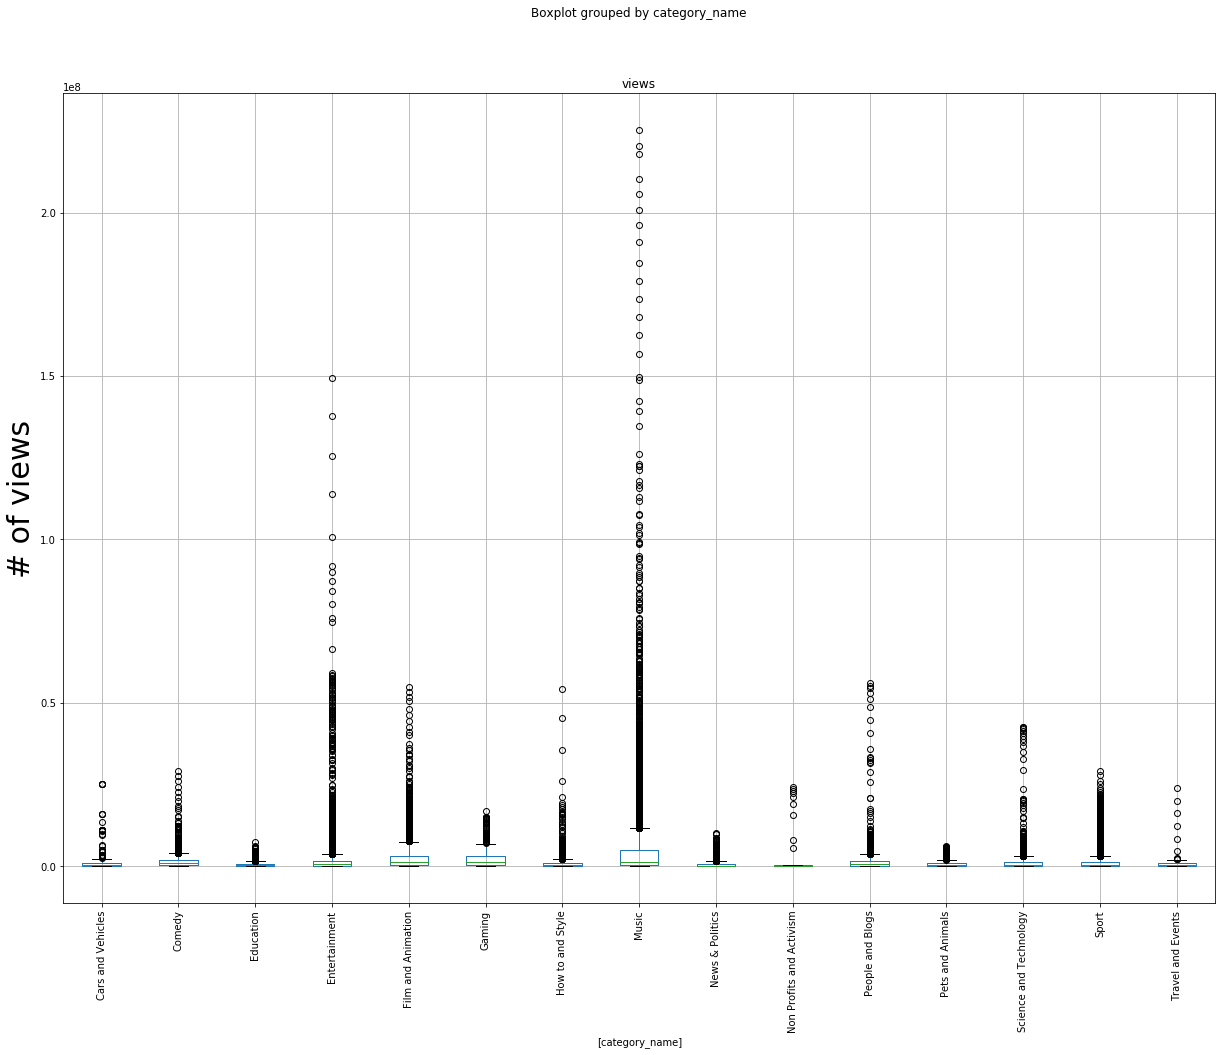

In [130]:
f = df[['views','category_name']].boxplot(by='category_name', figsize = (20,15))
f.set_xticklabels(f.get_xticklabels(),rotation=90)
plt.ylabel('# of views', fontsize=30)
# plt.savefig('figures/boxplot.png',dpi=300)
plt.show()

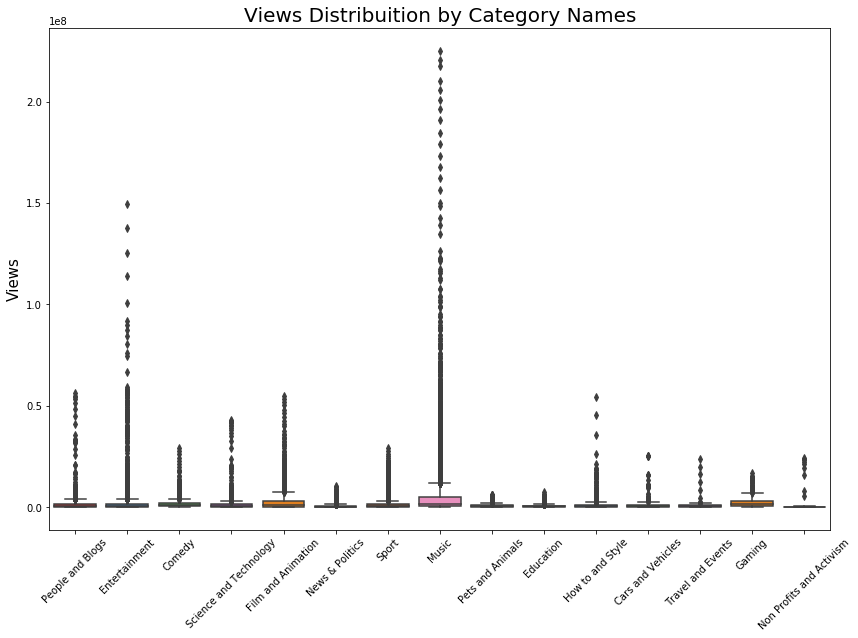

In [98]:
plt.figure(figsize = (14,9))
g1 = sns.boxplot(x='category_name', y='views', data=df, palette="Set1")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

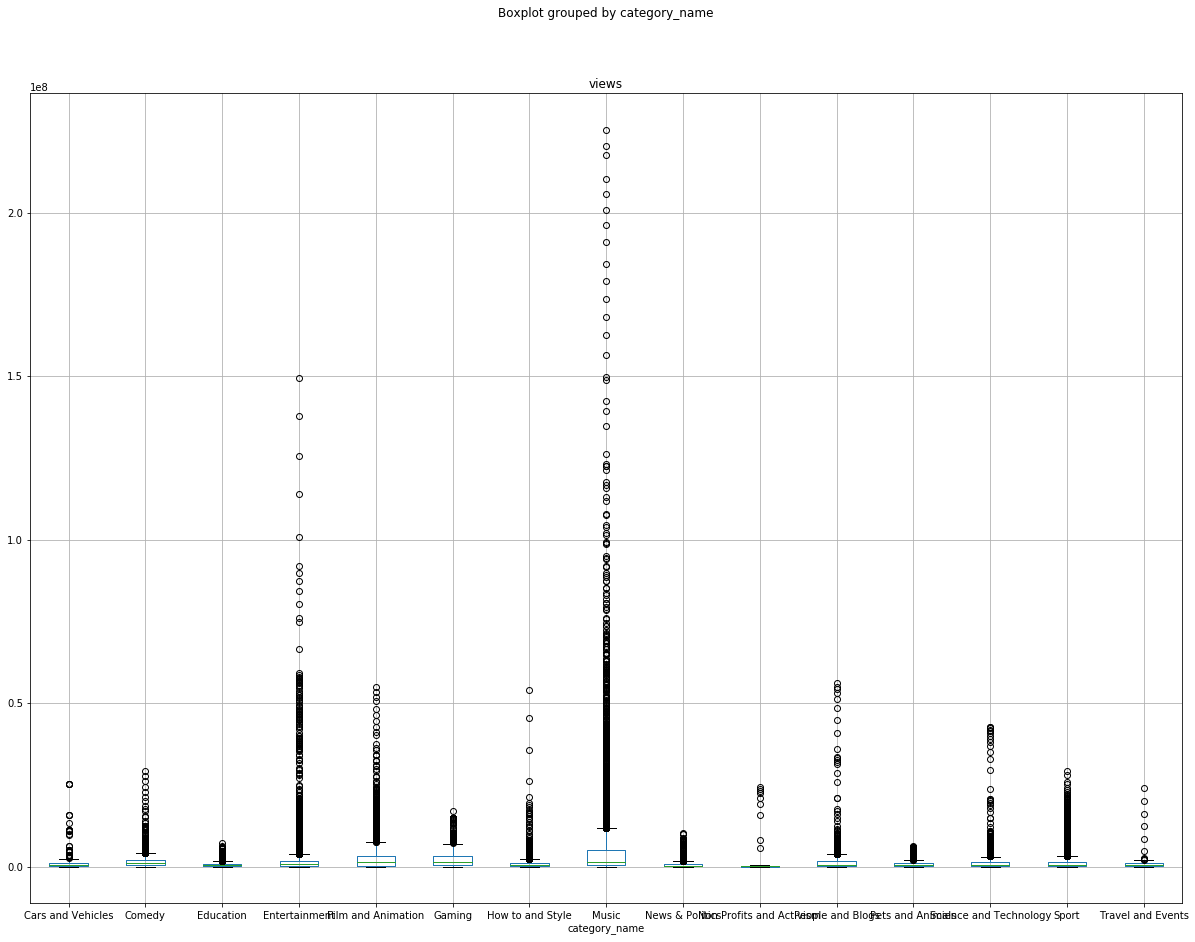

In [124]:
df.boxplot(column = 'views', by = 'category_name', figsize = (20,15));
plt.show()

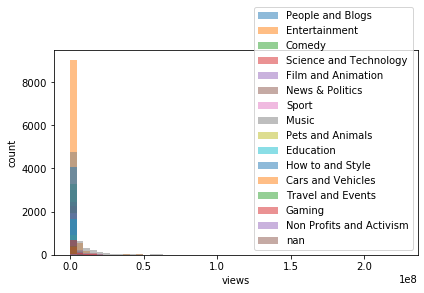

In [97]:
categories = df['category_name'].unique()
bin_range = (df['views'].min(),df['views'].max())

for c in categories:
    plt.hist(df[df['category_name']==c]['views'],alpha=0.5,label=c,range=bin_range,bins=50)
plt.legend()
plt.ylabel('count')
plt.xlabel('views')
plt.tight_layout()
# plt.savefig('figures/histo.png',dpi=300)
plt.show()

In [119]:
corrmat = df_preprocessed.corr()

# all_cols = corrmat.sort_values('SalePrice')['SalePrice'].sort_values()
all_cols = corrmat.sort_values('views')['views'].index
cols = all_cols[:10]

cols

Index(['x0_How to and Style', 'x0_News & Politics', 'x0_Education',
       'x0_Comedy', 'x0_People and Blogs', 'x0_Pets and Animals',
       'x0_Science and Technology', 'x0_Entertainment', 'x0_Travel and Events',
       'x2_False'],
      dtype='object')

In [123]:
df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes']/df['views'] * 100
# df['comment_rate'] =  df['comment_count'] /['views'] * 100

AssertionError: <class 'list'>